# OBJECTIVE:

# To apply Decision Trees on Amazon food reviews

In [1]:
%%time
# Functions to retireve files
import pickle
def openfromfile(filename):
   temp = pickle.load(open(filename,"rb"))
   return temp

Wall time: 0 ns


In [2]:
#Loading the variable from file
final_100000 = openfromfile("prepocessed_data.pickle")
final_100000.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
3,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
4,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


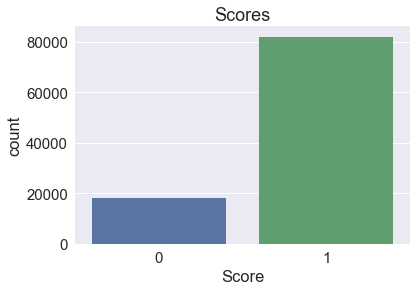

Wall time: 411 ms


In [9]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt
ax=plt.axes()
sns.countplot(final_100000.Score,ax=ax)
plt.title("Scores")
plt.show()
final_100000['Score'].value_counts()

In [3]:
%%time
final_100000['Score'].value_counts()

Wall time: 92.9 ms


1    81998
0    18002
Name: Score, dtype: int64

In [3]:
%%time
#storing cleanedtext into x and Score into y
x = final_100000['CleanedText']
y = final_100000['Score']
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
#splitting train data as train as 60% and  cross_validation as 20% and test data as 20%
x_tr, x_cv, y_tr, y_cv = train_test_split(X_train, Y_train, test_size=0.25,shuffle=False)
print(x_tr.shape)
print(x_cv.shape)
print(X_test.shape)
print(y_tr.shape)
print(y_cv.shape)
print(Y_test.shape)

(60000,)
(20000,)
(20000,)
(60000,)
(20000,)
(20000,)
Wall time: 7.81 s


# 1.BOW:

In [4]:
%%time
tr_bow_x = openfromfile("tr_bow_x.pickle")
cv_bow_x = openfromfile("cv_bow_x.pickle")
te_bow_x = openfromfile("te_bow_x.pickle")
print(tr_bow_x.shape)
print(cv_bow_x.shape)
print(te_bow_x.shape)

(60000, 34192)
(20000, 34192)
(20000, 34192)
Wall time: 556 ms


Finding the best 'max_depth' using simple Cross Validation: 

In [8]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
#taking the sample of Depth values
depth=[3,5,10,15,20,25,30,50,100]
#finding the maximum f1 score value index which is the index of Best depth value
f1_score_cv=[]
f1_score_train=[]
for i in depth:
   pred = []
   DT =DecisionTreeClassifier(max_depth=i)
   DT.fit(tr_bow_x, y_tr)
   #taking cross validate data in intervals of 500 for prediction
   for i in range(0,cv_bow_x.shape[0], 500):
        t = cv_bow_x[i:i+500]
        pred1 = DT.predict(t)
        pred.extend(pred1) 
   f1_score_i= f1_score(y_cv,pred)
   f1_score_cv.append(f1_score_i)
   #predicting train score to check overfitting and underfitting
   predict_train=DT.predict(tr_bow_x)
   f1_score_j= f1_score(y_tr,predict_train)
   f1_score_train.append(f1_score_j)
print("list of f1 score value for given depth values using cross validate data:",f1_score_cv)
print("----------------------------------------------------------------------------")
print("list of f1 score value for given depth values using train data:",f1_score_train)
#finding the index of maximum f1 score value which is the index of best depth using cv data
print("-----------------------------------------------------------------------------")
print("maximum f1 score value",max(f1_score_cv))
a=f1_score_cv.index(max(f1_score_cv)) 
print("best depth index value:",a)
best_depth=depth[a]
print("best depth value:",best_depth)

list of f1 score value for given depth values using cross validate data: [0.89545952320781741, 0.89676746611053182, 0.89656738877374298, 0.89700882781475877, 0.89493649060290825, 0.89315036699643158, 0.89212163701691349, 0.88689076130645783, 0.87877962408063204]
----------------------------------------------------------------------------
list of f1 score value for given depth values using train data: [0.90812984880492231, 0.91052197827636971, 0.91911353206730584, 0.92659552521520605, 0.93415296424800109, 0.94262989950945375, 0.94906181650742494, 0.97068995837974092, 0.9892272221338847]
-----------------------------------------------------------------------------
maximum f1 score value 0.897008827815
best depth index value: 3
best depth value: 15
Wall time: 2min 32s


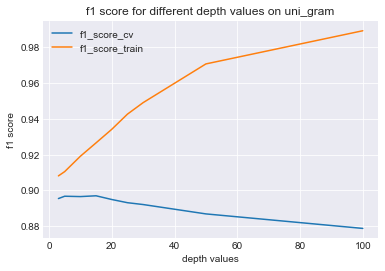

Wall time: 237 ms


In [11]:
%%time
#checking for overfitting or underfitting
#ploting the graph between C values and f1 score test and f1 score train
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid");
plt.plot(depth,f1_score_cv)
plt.plot(depth,f1_score_train)
plt.xlabel("depth values")
plt.ylabel("f1 score")
plt.title("f1 score for different depth values on uni_gram")
plt.gca().legend(('f1_score_cv','f1_score_train'))
plt.show()

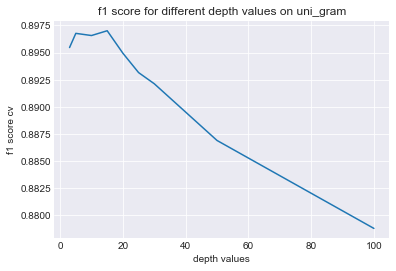

Wall time: 180 ms


In [12]:
%%time
#ploting the graph between C values and f1 score for best C.
C=[3,5,10,15,20,25,30,50,100]
f1_score_cv=[ 0.89545952320781741, 0.89676746611053182, 0.89656738877374298, 0.89700882781475877, 0.89493649060290825, 0.89315036699643158, 0.89212163701691349, 0.88689076130645783, 0.87877962408063204]
sns.set_style("darkgrid")
plt.plot(depth,f1_score_cv)
plt.xlabel("depth values")
plt.ylabel("f1 score cv")
plt.title("f1 score for different depth values on uni_gram")
plt.show()

Confusion matrices for test data
----------------------------
Accuracy on test set: 81.765%
Precision on test set: 0.830
Recall on test set: 0.972
F1-Score on test set: 0.895
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 9.93 s


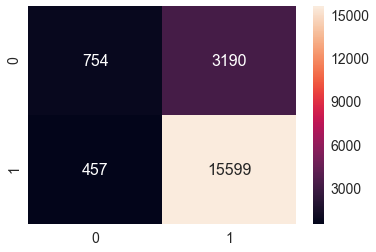

In [6]:
%%time
#Testing Accuracy on Test data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
#Testing Accuracy on Test data with depth value
clf = DecisionTreeClassifier(max_depth=15)
clf.fit(tr_bow_x, y_tr)
y_pred = clf.predict(te_bow_x)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 86.9616666667
precision: 0.868782417582
Recall: 0.9927670176
F1-score 0.926645850329


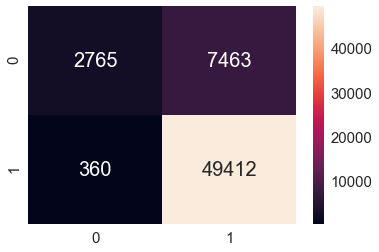

Wall time: 391 ms


In [8]:
%%time
#Using best depth value to find accuracy,precision,recall,f1_score on train data
import matplotlib.pyplot as plt
pred = clf.predict(tr_bow_x)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(y_tr,pred)*100)
print("precision:",precision_score(y_tr,pred))
print("Recall:",recall_score(y_tr,pred))
print("F1-score",f1_score(y_tr,pred))
cm = pd.DataFrame(confusion_matrix(y_tr,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

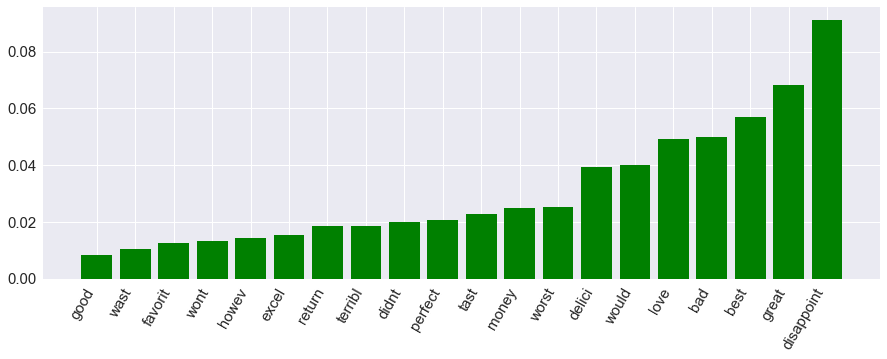

Wall time: 4.38 s


In [9]:
%%time
#ploting the important features
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
def important_features_plot(classifier, vectorizer, top_features=20):
 important_features =vectorizer.get_feature_names()
 important_features= np.array(important_features)
 coefficients = classifier.feature_importances_.ravel()
 coefficients_ = np.argsort(coefficients)[-top_features:]
 top_coefficients = np.hstack([coefficients_])
 plt.figure(figsize=(15, 5))
 plot_color = ['green' for i in coefficients[top_coefficients]]
 plt.bar(np.arange(top_features), coefficients[top_coefficients], color=plot_color)
 plt.xticks(np.arange(top_features), important_features[top_coefficients], rotation=60, ha='right')
 plt.show()
count_vect = CountVectorizer()
count_vect.fit_transform(x_tr)
important_features_plot(clf, count_vect)

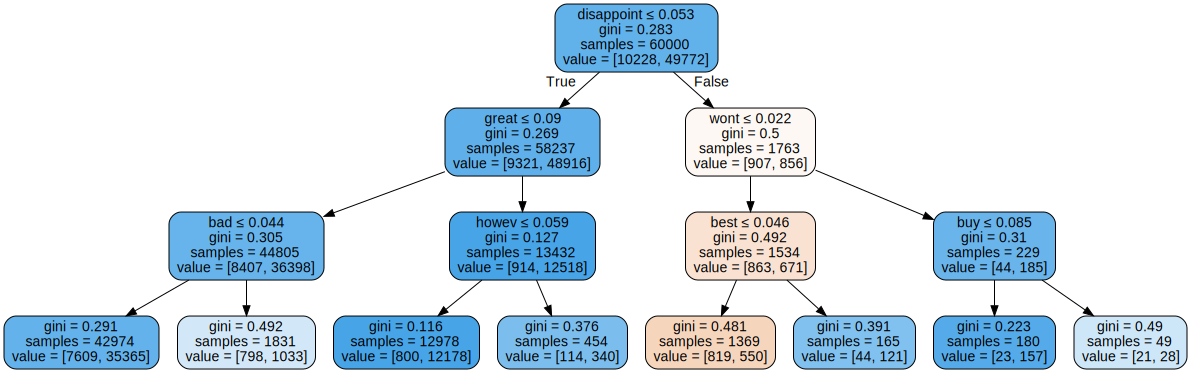

In [12]:
# Visualize data using graphviz
from sklearn import tree 
import pydotplus
from collections import defaultdict
import graphviz
important_features =count_vect.get_feature_names()
#instead for depth of 15,only depth of 3 is taken.
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(tr_bow_x, y_tr)
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=important_features,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

# 2.TF-IDF:

In [13]:
%%time
tr_tfidf_x = openfromfile("tr_tfidf_x.pickle")
cv_tfidf_x = openfromfile("cv_tfidf_x.pickle")
te_tfidf_x = openfromfile("te_tfidf_x.pickle")
print(tr_tfidf_x.shape)
print(cv_tfidf_x.shape)
print(te_tfidf_x.shape)

(60000, 34192)
(20000, 34192)
(20000, 34192)
Wall time: 628 ms


Finding the best 'max_depth' using simple Cross Validation:

In [34]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
#taking the sample of Depth values
depth=[3,5,10,15,20,25,30,50,100]
#finding the maximum f1 score value index which is the index of Best depth value
f1_score_cv=[]
f1_score_train=[]
for i in depth:
   pred = []
   DT =DecisionTreeClassifier(max_depth=i)
   DT.fit(tr_tfidf_x, y_tr)
   #taking cross validate data in intervals of 500 for prediction
   for i in range(0,cv_tfidf_x.shape[0], 500):
        t = cv_tfidf_x[i:i+500]
        pred1 = DT.predict(t)
        pred.extend(pred1) 
   f1_score_i= f1_score(y_cv,pred)
   f1_score_cv.append(f1_score_i)
   #predicting train score to check overfitting and underfitting
   predict_train=DT.predict(tr_tfidf_x)
   f1_score_j= f1_score(y_tr,predict_train)
   f1_score_train.append(f1_score_j)
print("list of f1 score value for given depth values using cross validate data:",f1_score_cv)
print("----------------------------------------------------------------------------")
print("list of f1 score value for given depth values using train data:",f1_score_train)
#finding the index of maximum f1 score value which is the index of best depth using cv data
print("-----------------------------------------------------------------------------")
print("maximum f1 score value",max(f1_score_cv))
a=f1_score_cv.index(max(f1_score_cv)) 
print("best depth index value:",a)
best_depth=depth[a]
print("best depth value:",best_depth)

list of f1 score value for given depth values using cross validate data: [0.89536319748512405, 0.89690547319767766, 0.89693593314763231, 0.89661293555129284, 0.89549575478486121, 0.89257733155359531, 0.89098854375811964, 0.88496157411560661, 0.87852723706050995]
----------------------------------------------------------------------------
list of f1 score value for given depth values using train data: [0.90828631485783839, 0.91028798962866919, 0.91878925901382291, 0.9267921407966323, 0.93383443026978019, 0.94130983567516069, 0.94821335091222836, 0.97086730839048996, 0.98964992692311515]
-----------------------------------------------------------------------------
maximum f1 score value 0.896935933148
best depth index value: 2
best depth value: 10
Wall time: 3min 16s


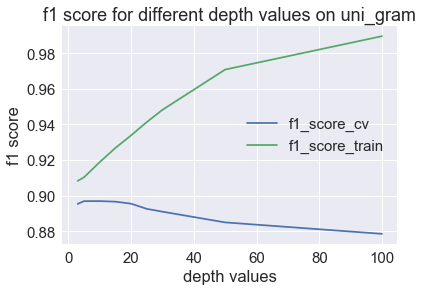

Wall time: 250 ms


In [35]:
%%time
#checking for overfitting or underfitting
#ploting the graph between C values and f1 score test and f1 score train
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid");
plt.plot(depth,f1_score_cv)
plt.plot(depth,f1_score_train)
plt.xlabel("depth values")
plt.ylabel("f1 score")
plt.title("f1 score for different depth values on uni_gram")
plt.gca().legend(('f1_score_cv','f1_score_train'))
plt.show()

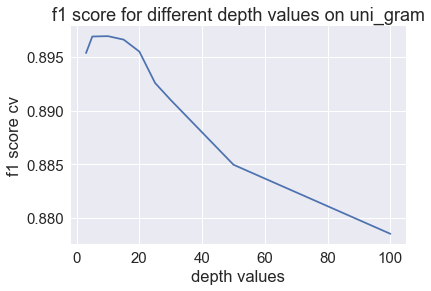

Wall time: 163 ms


In [45]:
%%time
#ploting the graph between C values and f1 score for best C.
C=[3,5,10,15,20,25,30,50,100]
f1_score_cv=[0.89536319748512405, 0.89690547319767766, 0.89693593314763231, 0.89661293555129284, 0.89549575478486121, 0.89257733155359531, 0.89098854375811964, 0.88496157411560661, 0.87852723706050995]
sns.set_style("darkgrid")
plt.plot(depth,f1_score_cv)
plt.xlabel("depth values")
plt.ylabel("f1 score cv")
plt.title("f1 score for different depth values on uni_gram")
plt.show()

Confusion matrices for test data
----------------------------
Accuracy on test set: 81.770%
Precision on test set: 0.827
Recall on test set: 0.978
F1-Score on test set: 0.896
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 6.28 s


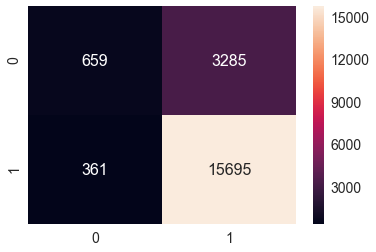

In [14]:
%%time
#Testing Accuracy on Test data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
#Testing Accuracy on Test data with depth value
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(tr_tfidf_x, y_tr)
y_pred = clf.predict(te_tfidf_x)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 85.49
precision: 0.857954743558
Recall: 0.98878887728
F1-score 0.918737282282


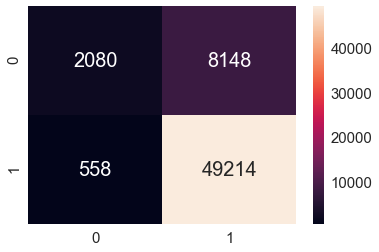

Wall time: 561 ms


In [15]:
%%time
#Using best depth value to find accuracy,precision,recall,f1_score on train data
pred = clf.predict(tr_tfidf_x)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(y_tr,pred)*100)
print("precision:",precision_score(y_tr,pred))
print("Recall:",recall_score(y_tr,pred))
print("F1-score",f1_score(y_tr,pred))
cm = pd.DataFrame(confusion_matrix(y_tr,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

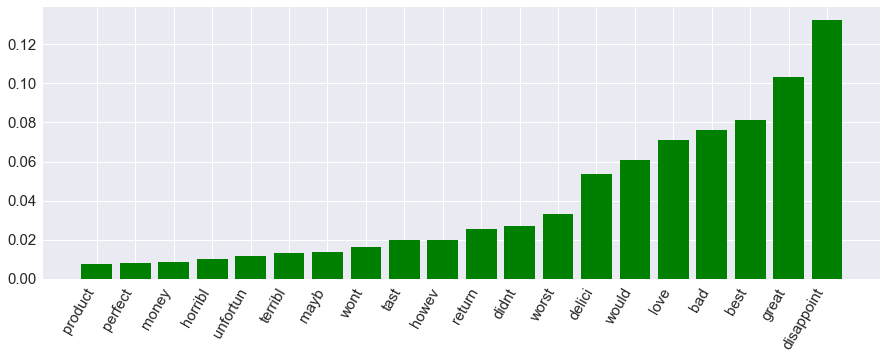

Wall time: 5 s


In [16]:
%%time
#ploting the important features
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
def important_features_plot(classifier, vectorizer, top_features=20):
 important_features =vectorizer.get_feature_names()
 important_features= np.array(important_features)
 coefficients = classifier.feature_importances_.ravel()
 coefficients_ = np.argsort(coefficients)[-top_features:]
 top_coefficients = np.hstack([coefficients_])
 plt.figure(figsize=(15, 5))
 plot_color = ['green' for i in coefficients[top_coefficients]]
 plt.bar(np.arange(top_features), coefficients[top_coefficients], color=plot_color)
 plt.xticks(np.arange(top_features), important_features[top_coefficients], rotation=60, ha='right')
 plt.show()
tfidf = TfidfVectorizer()
#vectorizing the train data.
tfidf.fit_transform(x_tr)
important_features_plot(clf,tfidf)

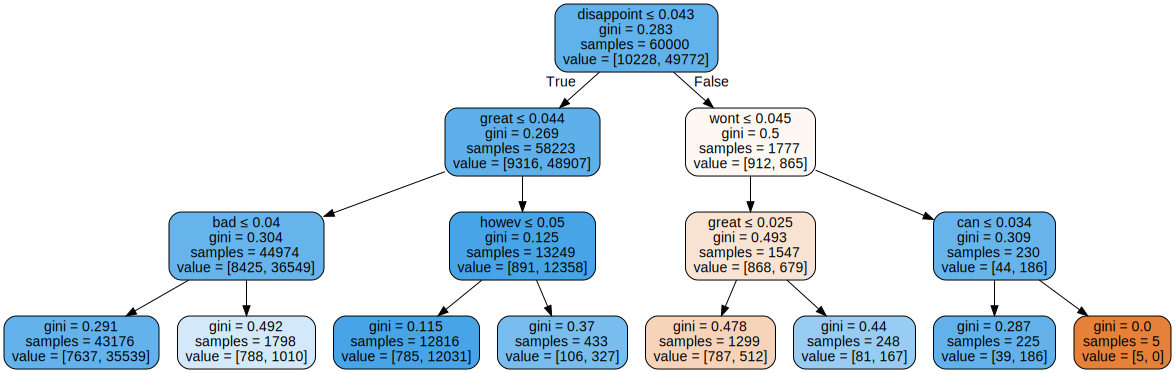

In [17]:
# Visualize data using graphviz.
from sklearn import tree 
import pydotplus
from collections import defaultdict
import graphviz
#instead for depth of 15,only depth of 3 is taken.
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(tr_tfidf_x, y_tr)
important_features =count_vect.get_feature_names()
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=important_features,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

# 3.Avg-W2V:

In [42]:
%%time
#loading the Average word to vector train and test data
avg_w2v_tr = openfromfile("avg_w2v_tr.pickle")
avg_w2v_cv = openfromfile("avg_w2v_cv.pickle")
avg_w2v_te = openfromfile("avg_w2v_te.pickle")
print(len(avg_w2v_tr))
print(len(avg_w2v_cv))
print(len(avg_w2v_te))

60000
20000
20000
Wall time: 772 ms


Finding the best 'max_depth' using simple Cross Validation:

In [43]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
#taking the sample of Depth values
depth=[3,5,10,15,20,25,30,50,100]
#finding the maximum f1 score value index which is the index of Best depth value
f1_score_cv=[]
f1_score_train=[]
for i in depth:
   pred = []
   DT =DecisionTreeClassifier(max_depth=i)
   DT.fit(avg_w2v_tr, y_tr)
   #taking cross validate data in intervals of 500 for prediction
   for i in range(0,avg_w2v_cv.shape[0], 500):
        t = avg_w2v_cv[i:i+500]
        pred1 = DT.predict(t)
        pred.extend(pred1) 
   f1_score_i= f1_score(y_cv,pred)
   f1_score_cv.append(f1_score_i)
   #predicting train score to check overfitting and underfitting
   predict_train=DT.predict(avg_w2v_tr)
   f1_score_j= f1_score(y_tr,predict_train)
   f1_score_train.append(f1_score_j)
print("list of f1 score value for given depth values using cross validate data:",f1_score_cv)
print("----------------------------------------------------------------------------")
print("list of f1 score value for given depth values using train data:",f1_score_train)
#finding the index of maximum f1 score value which is the index of best depth using cv data
print("-----------------------------------------------------------------------------")
print("maximum f1 score value",max(f1_score_cv))
a=f1_score_cv.index(max(f1_score_cv)) 
print("best depth index value:",a)
best_depth=depth[a]
print("best depth value:",best_depth)

list of f1 score value for given depth values using cross validate data: [0.89258552425442217, 0.89456797072896133, 0.88238245624391254, 0.8572995369242018, 0.84648378436757488, 0.84347261311972288, 0.84063188603705652, 0.84068490601153922, 0.83950693948520516]
----------------------------------------------------------------------------
list of f1 score value for given depth values using train data: [0.90502677621857675, 0.90974177309592619, 0.93080513418903155, 0.97829301942412483, 0.99533645570633678, 0.99922685329290217, 0.99993972514666885, 0.99996986166504254, 0.99996986166504254]
-----------------------------------------------------------------------------
maximum f1 score value 0.894567970729
best depth index value: 1
best depth value: 5
Wall time: 56.5 s


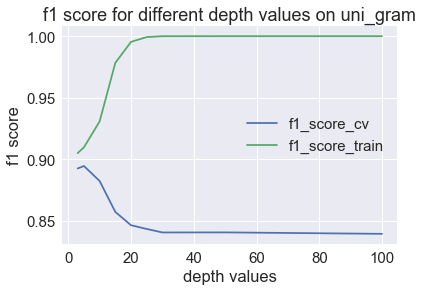

Wall time: 265 ms


In [44]:
%%time
#checking for overfitting or underfitting
#ploting the graph between C values and f1 score test and f1 score train
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid");
plt.plot(depth,f1_score_cv)
plt.plot(depth,f1_score_train)
plt.xlabel("depth values")
plt.ylabel("f1 score")
plt.title("f1 score for different depth values on uni_gram")
plt.gca().legend(('f1_score_cv','f1_score_train'))
plt.show()

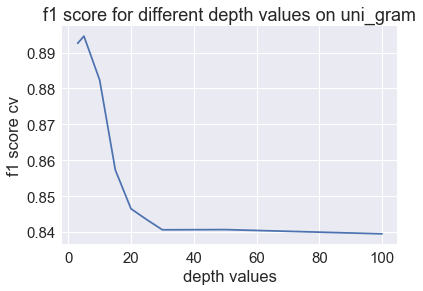

Wall time: 175 ms


In [46]:
%%time
#ploting the graph between C values and f1 score for best C.
C=[3,5,10,15,20,25,30,50,100]
f1_score_cv=[0.89258552425442217, 0.89456797072896133, 0.88238245624391254, 0.8572995369242018, 0.84648378436757488, 0.84347261311972288, 0.84063188603705652, 0.84068490601153922, 0.83950693948520516]
sns.set_style("darkgrid")
plt.plot(depth,f1_score_cv)
plt.xlabel("depth values")
plt.ylabel("f1 score cv")
plt.title("f1 score for different depth values on uni_gram")
plt.show()

Confusion matrices for test data
----------------------------
Accuracy on test set: 80.960%
Precision on test set: 0.817
Recall on test set: 0.983
F1-Score on test set: 0.892
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 3.18 s


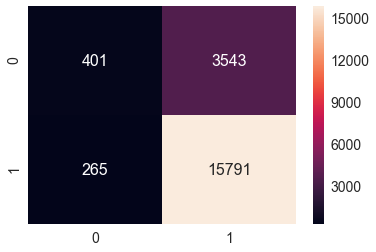

In [68]:
%%time
#Testing Accuracy on Test data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
#Testing Accuracy on Test data with depth value
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(avg_w2v_tr, y_tr)
y_pred = clf.predict(avg_w2v_te)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 83.8633333333
precision: 0.848620821594
Recall: 0.980350397814
F1-score 0.909741773096


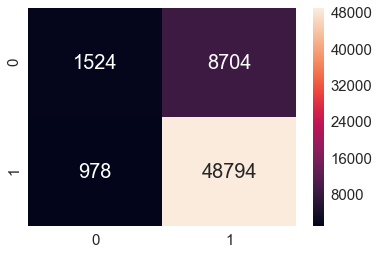

Wall time: 309 ms


In [69]:
%%time
#Using best depth value to find accuracy,precision,recall,f1_score on train data
pred = clf.predict(avg_w2v_tr)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(y_tr,pred)*100)
print("precision:",precision_score(y_tr,pred))
print("Recall:",recall_score(y_tr,pred))
print("F1-score",f1_score(y_tr,pred))
cm = pd.DataFrame(confusion_matrix(y_tr,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

# 4.Tf-idf- W2V:

In [49]:
%%time
#loading the tfidf word to vector train and test data
tfidf_w2v_tr = openfromfile("tfidf_w2v_tr.pickle")
tfidf_w2v_cv = openfromfile("tfidf_w2v_cv.pickle")
tfidf_w2v_te = openfromfile("tfidf_w2v_te.pickle")
print(len(tfidf_w2v_tr))
print(len(tfidf_w2v_cv))
print(len(tfidf_w2v_te))

60000
20000
20000
Wall time: 786 ms


1.Finding the best 'C' using maximum f1 score value and simple cross validation:

In [50]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
#taking the sample of Depth values
depth=[3,5,10,15,20,25,30,50,100]
#finding the maximum f1 score value index which is the index of Best depth value
f1_score_cv=[]
f1_score_train=[]
for i in depth:
   pred = []
   DT =DecisionTreeClassifier(max_depth=i)
   DT.fit(tfidf_w2v_tr, y_tr)
   #taking cross validate data in intervals of 500 for prediction
   for i in range(0,tfidf_w2v_cv.shape[0], 500):
        t = tfidf_w2v_cv[i:i+500]
        pred1 = DT.predict(t)
        pred.extend(pred1) 
   f1_score_i= f1_score(y_cv,pred)
   f1_score_cv.append(f1_score_i)
   #predicting train score to check overfitting and underfitting
   predict_train=DT.predict(tfidf_w2v_tr)
   f1_score_j= f1_score(y_tr,predict_train)
   f1_score_train.append(f1_score_j)
print("list of f1 score value for given depth values using cross validate data:",f1_score_cv)
print("----------------------------------------------------------------------------")
print("list of f1 score value for given depth values using train data:",f1_score_train)
#finding the index of maximum f1 score value which is the index of best depth using cv data
print("-----------------------------------------------------------------------------")
print("maximum f1 score value",max(f1_score_cv))
a=f1_score_cv.index(max(f1_score_cv)) 
print("best depth index value:",a)
best_depth=depth[a]
print("best depth value:",best_depth)

list of f1 score value for given depth values using cross validate data: [0.89411114183024609, 0.89511658355851453, 0.88701951162518977, 0.86839559908112685, 0.85470399265718222, 0.84985975403014513, 0.850859656137545, 0.85092230468389118, 0.85023112480739604]
----------------------------------------------------------------------------
list of f1 score value for given depth values using train data: [0.90682505556972626, 0.90846007691813457, 0.92727763218745185, 0.97397938961553709, 0.99483504163997438, 0.99916669176631223, 0.99987945755901553, 0.99996986166504254, 0.99996986166504254]
-----------------------------------------------------------------------------
maximum f1 score value 0.895116583559
best depth index value: 1
best depth value: 5
Wall time: 56.4 s


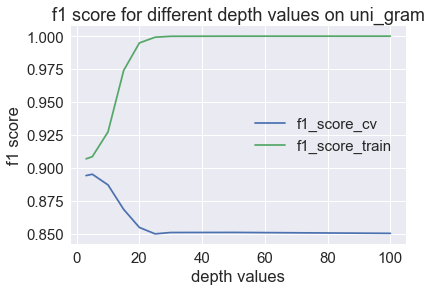

Wall time: 202 ms


In [51]:
%%time
#checking for overfitting or underfitting
#ploting the graph between C values and f1 score test and f1 score train
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid");
plt.plot(depth,f1_score_cv)
plt.plot(depth,f1_score_train)
plt.xlabel("depth values")
plt.ylabel("f1 score")
plt.title("f1 score for different depth values on uni_gram")
plt.gca().legend(('f1_score_cv','f1_score_train'))
plt.show()

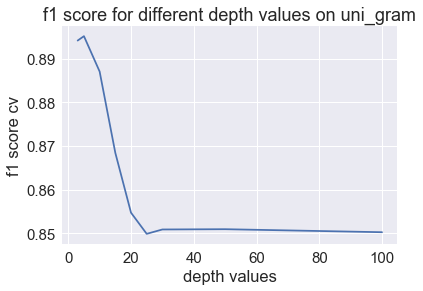

Wall time: 166 ms


In [52]:
%%time
#ploting the graph between C values and f1 score for best C.
C=[3,5,10,15,20,25,30,50,100]
f1_score_cv=[0.89411114183024609, 0.89511658355851453, 0.88701951162518977, 0.86839559908112685, 0.85470399265718222, 0.84985975403014513, 0.850859656137545, 0.85092230468389118, 0.85023112480739604]
sns.set_style("darkgrid")
plt.plot(depth,f1_score_cv)
plt.xlabel("depth values")
plt.ylabel("f1 score cv")
plt.title("f1 score for different depth values on uni_gram")
plt.show()

Confusion matrices for test data
----------------------------
Accuracy on test set: 80.630%
Precision on test set: 0.809
Recall on test set: 0.992
F1-Score on test set: 0.892
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Wall time: 3.14 s


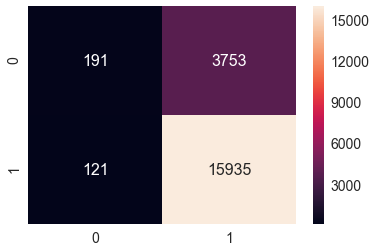

In [70]:
%%time
#Testing Accuracy on Test data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
#Testing Accuracy on Test data with depth value
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(tfidf_w2v_tr, y_tr)
y_pred = clf.predict(tfidf_w2v_te)
print("Confusion matrices for test data")
print("----------------------------")
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrices for train data
----------------------------
train_accuracy: 83.3783333333
precision: 0.836282213773
Recall: 0.994273888934
F1-score 0.908460076918


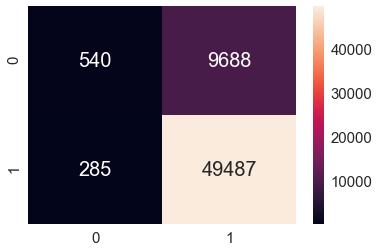

Wall time: 589 ms


In [71]:
%%time
#Using best depth value to find accuracy,precision,recall,f1_score on train data
pred = clf.predict(tfidf_w2v_tr)
print("Confusion matrices for train data")
print("----------------------------")
print("train_accuracy:",accuracy_score(y_tr,pred)*100)
print("precision:",precision_score(y_tr,pred))
print("Recall:",recall_score(y_tr,pred))
print("F1-score",f1_score(y_tr,pred))
cm = pd.DataFrame(confusion_matrix(y_tr,pred),range(2),range(2))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g')
plt.show()

# Summary:

**Decision trees with different text classifications:**
**Below values are for test data**    

|          |sample size|Maximum depth      |              |              |              |            |                            
|----------|-----------|-------------------|--------------|--------------|--------------|------------| 
|          |           |                   |Accuracy      |Precision     |Recall        |F1-score    |
|BOW       |  100k     |15                 |   81.50%     |    0.830     |    0.973     |  0.896     |
|TF-IDF    |  100k     |10                 |   81.82%     |    0.827     |    0.978     |  0.896     |
|Avg-W2V   |  100k     |5                  |   80.96%     |    0.817     |    0.983     |  0.892     |
|TF-IDF W2V|  100k     |5                  |   80.63%     |    0.809     |    0.992     |  0.892     |
    

Step by step procedure:

1.Firstly 100k rows were taken and splitted into 60:20:20 as 60k rows for train data,20k rows for cv data and 20k rows for test data.    

2.Then converted these train,cv and test data into vectors by using Bag of words,Tfidf,Avg word 2 vec and   Tfidf word 2 vec.

3.Now applied DecisionTreeClassifier for the trained data to find the best maximum depth value using simle cross validation.

4.This is done with finding the maximum f1 score value.And then found test and cv f1 scores.

5.Using the obtained maximum depth value found the metrics for both train and test data.And then found important features.

6.Later Visualised the decision tree using Graphviz.

7.And then printed the words in each node of decision tree.